## 1. Cities in Sweden - create dataset

In [2]:
import pandas as pd

cities = pd.Series(["Malmö", "Stockholm", "Uppsala", "Göteborg"])
population = pd.Series([347949, 975551, 233839, 583056])

cities_and_population = pd.DataFrame({"Kommun":cities, "Population": population})
cities_and_population


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [3]:
# cities_and_population.loc["Göteborg"]
cities_and_population.iloc[3:4]

,Kommun,Population
3,Göteborg,583056


In [4]:
sorted_by_size_cities = cities_and_population.sort_values(by="Population", ascending=False)

In [5]:
sorted_by_size_cities.tail(-1)

,Kommun,Population
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [6]:
sorted_by_size_cities ["Percetage_of_population"] = round((sorted_by_size_cities["Population"] /10379295 * 100))
sorted_by_size_cities

,Kommun,Population,Percetage_of_population
1,Stockholm,975551,9.0
3,Göteborg,583056,6.0
0,Malmö,347949,3.0
2,Uppsala,233839,2.0


## Exercise 2 - Cities in Sweden - real dataset

In [7]:
import pandas as pd

df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")
df.drop(df.index[0:6], inplace=True)
df.reset_index(drop = True, inplace = True) # inplace = true has to be if you dont want to create new variable

df.rename(columns= # renames colums using dicts
{"Unnamed: 0": "Rang2020",
"Unnamed: 1": "Rang 2019",
"Unnamed: 2": "Kommun",
"Unnamed: 3": "Folkmängd 2020",
"Unnamed: 4": "Folkmängd 2019",
"Unnamed: 5": "Förändring"},
inplace=True)

df.head()


,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074


In [8]:
df = df.sort_values(by="Folkmängd 2020", ascending=False)
biggest_five_cities = df.head()
biggest_five_cities


,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822


In [9]:
df = df.sort_values(by="Folkmängd 2020", ascending=True)
smallest_five_cities = df.head()
smallest_five_cities

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290.0,Bjurholm,2387,2408.0,-0.872093
194,289,289.0,Sorsele,2442,2489.0,-1.888309
29,288,288.0,Dorotea,2498,2551.0,-2.077617
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
271,286,286.0,Åsele,2805,2794.0,0.393701


In [10]:
df_2020 = sum(df["Folkmängd 2020"])
df_2019 = sum(df["Folkmängd 2019"])
print(f"Populationen i Sverige 2020: {df_2020}")
print(f"Populationen i Sverige 2019: {df_2019:.0f}")

Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589


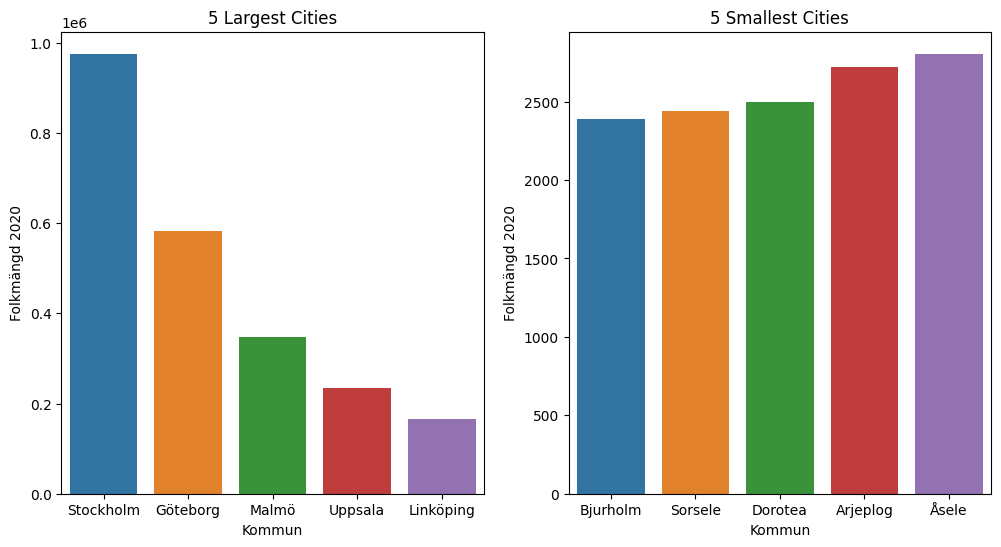

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize = (12, 6)) # creates two graphs and 

data_frames = (biggest_five_cities, smallest_five_cities) # the data that is being plotted
titles = ("5 Largest Cities", "5 Smallest Cities")
x_columns = ["Kommun", "Kommun"]

for i, (data_frame, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data_frame, x = x_columns[i], y = "Folkmängd 2020", ax = ax[i])
    ax[i].set(title = title)

## Exercise 3

### A
- Clean the data so it looks like this:

In [12]:
df_kvinnor = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Kvinnor")
df_män = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Män")

# essentially copied alexanders function - thanks alexander!!
def gender_adding(df, gender):

    df.rename(
        columns={  # renames colums using dicts
            "Unnamed: 0": "Rang 2020",
            "Unnamed: 1": "Rang 2019",
            "Unnamed: 2": "Kommun",
            "Unnamed: 3": "Folkmängd 2020",
            "Unnamed: 4": "Folkmängd 2019",
            "Unnamed: 5": "Förändring",
        },
        inplace=True,
    )

    # om du skapar en variabel behöver du inte ha med 'inplace=True'!!!!
    df.drop(df.index[0:6], inplace=True)  # tar bort första raderna
    df.reset_index(
        drop=True, inplace=True
    )  # resettar indexen så det börjar på 0, inte 6
    # inplace = true has to be if you dont want to create new variable

    df["Rang 2019"] = df["Rang 2019"].astype(
        int
    )  # konverterar alla rader till int istället för float
    df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)  # samma som ovan

    # hoppar över raden om det inte finns något
    if gender == None:
        pass
    else:
        # kolumn-nr, vad det ska stå som titel, vad det ska stå på varje rad i kolumnen
        df.insert(
            6, "Kön", gender
        )  # Insert column into DataFrame at specified location.
    return df


df_women = gender_adding(df_kvinnor, "Kvinna")
df_men = gender_adding(df_män, "Man")

df_men.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man


## B
- Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now

In [13]:
df_merged_genders = pd.concat([df_men, df_women]) # Merge with .concat to get it vertically
df_merged_genders

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...,...,...
285,55,57,Österåker,22997,22442,2.473042,Kvinna
286,117,118,Östhammar,10846,10803,0.398038,Kvinna
287,160,159,Östra Göinge,7270,7262,0.110162,Kvinna
288,284,284,Överkalix,1559,1578,-1.204056,Kvinna


## C
- Extract and change column name from the total DataFrame so that the head look like this:

In [14]:
df_total = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")

# ändrar namnen på columnerna
df_total.rename(columns={
    "Unnamed: 2": "Kommun",
    "Unnamed: 3": "Total Pop 2020",
    "Unnamed: 4": "Total Pop 2019",
    "Unnamed: 5": "Total förändring"},
    inplace=True)

df_total.drop(df_total.index[0:6], inplace=True) # tar bort första raderna
df_total.reset_index(drop= True, inplace=True) # resettar indexen, 'drop' tar bort index kolumnen

# tar bort två kolumner
df_total.pop("Unnamed: 0")
df_total.pop("Unnamed: 1")

df_total.head()


,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402.0,1.483982
1,Alingsås,41602,41420.0,0.439401
2,Alvesta,20224,20134.0,0.447005
3,Aneby,6821,6848.0,-0.394276
4,Arboga,14039,14087.0,-0.34074


## D
- Merge this data with the data in B) so that the head look like this:

In [15]:

merged_df_data = pd.concat([df_merged_genders, df_total], axis = 1)
#merged_df_data = pd.join([df_merged_genders, df_total], axis = 1)
#merged_df_data = pd.merge([df_merged_genders, df_total], axis = 1)

# tar bort kolumner som inte behövs
merged_df_data.pop("Rang 2020")
merged_df_data.pop("Rang 2019")
merged_df_data = merged_df_data.T.drop_duplicates().T # tar bort den ena "kommun" kolumnen som var onödig

# skapar en ny variabel så att ändringarna går igenom
df = merged_df_data.sort_values(by="Folkmängd 2020", ascending=False, ignore_index=True)
df


,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
0,Stockholm,492569,491853,0.145572,Kvinna,975551,974073.0,0.151734
1,Stockholm,482982,482220,0.158019,Man,975551,974073.0,0.151734
2,Göteborg,292505,290308,0.756782,Man,583056,579281.0,0.65167
3,Göteborg,290551,288973,0.546072,Kvinna,583056,579281.0,0.65167
4,Malmö,175411,173543,1.07639,Kvinna,347949,344166.0,1.099179
...,...,...,...,...,...,...,...,...
575,Sorsele,1285,1319,-2.57771,Man,2442,2489.0,-1.888309
576,Bjurholm,1233,1249,-1.281025,Man,2387,2408.0,-0.872093
577,Dorotea,1171,1195,-2.008368,Kvinna,2498,2551.0,-2.077617
578,Sorsele,1157,1170,-1.111111,Kvinna,2442,2489.0,-1.888309


## E
- Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities.

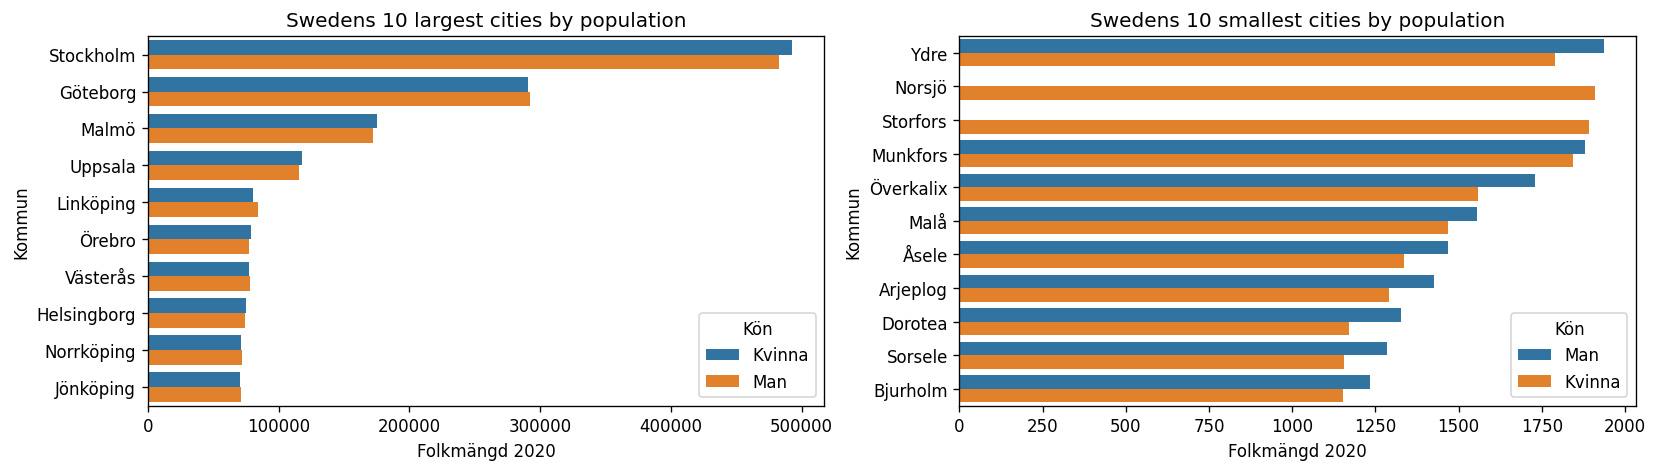

In [16]:
import seaborn as sns

data = [df.head(20), df.tail(20)]
titles = ["Swedens 10 largest cities by population", "Swedens 10 smallest cities by population"]
fig, ax = plt.subplots(1,2, figsize = (16, 4), dpi = 120)

for i, (datapoint, title) in enumerate(zip(data, titles)):
    sns.barplot(data = datapoint, x = "Folkmängd 2020", y = "Kommun", hue = "Kön", ax = ax[i])
    ax[i].set(title = title)


## F
- Create a pie chart showing the total male and female population in Sweden 2020

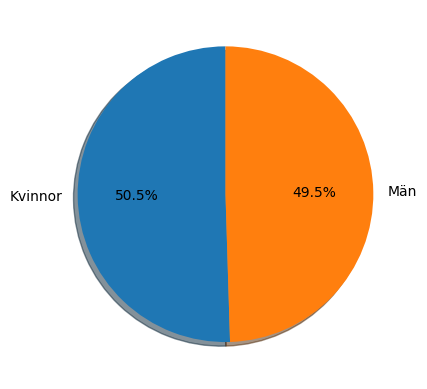

In [17]:

female_pop = df["Folkmängd 2020"][0]
male_pop = df["Folkmängd 2020"][1]
pop_list = [female_pop, male_pop]
mylabels = ["Kvinnor", "Män"]


plt.pie(pop_list, startangle=90, labels=mylabels, autopct="%0.1f%%", shadow=True);


In [1]:
df[df["Förändring"] == "."] = 0.0
df["Förändring"] = df["Förändring"].astype(float)

percent_diff = df["Förändring"].sort_values()


data = [percent_diff.head(5), percent_diff.tail(5)]
titles = ["Largest percentual differences", "Largest percentual differences"]
fig, ax = plt.subplots(1,2, figsize = (16, 4), dpi = 120)

for i, (datapoint, title) in enumerate(zip(data, titles)):
    sns.barplot(data = datapoint, x = "Förändring", y = "Kommun", ax = ax[i])
    ax[i].set(title = title)

NameError: name 'df' is not defined